In [1]:
import pandas as pd,matplotlib.pyplot as plt,numpy as np,seaborn as sns
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
#for summarizing categorical data
df.describe(include=['O'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


In [7]:
#seperating numerical columns
df_num = df.select_dtypes(include='number')

In [8]:
df_num

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [9]:
#seperating categorical columns
df_cat = df.select_dtypes(include='object')
df_cat

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


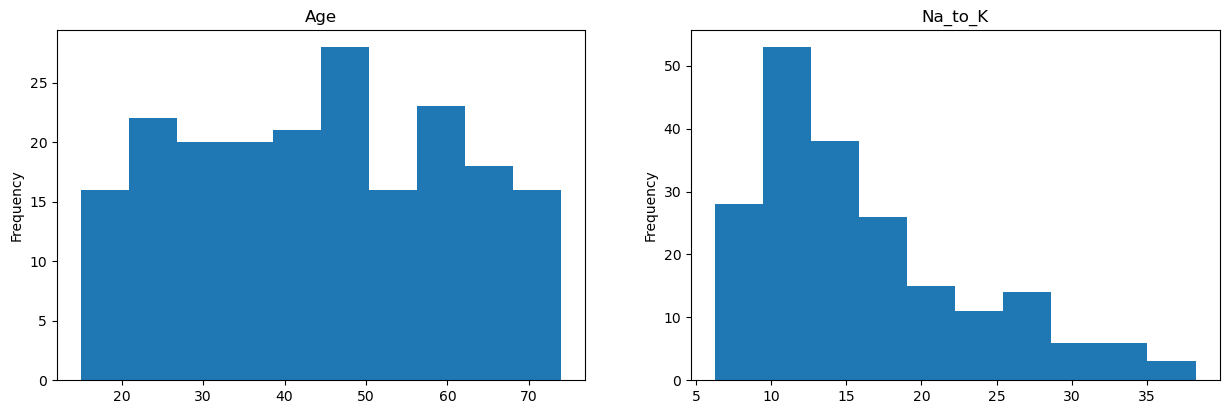

In [10]:
#applying univarient analysis
j=1
plt.figure(figsize=(15,10))
for i in df_num:
    plt.subplot(2,2,j)
    plt.title(i)
    plt.hist(df_num[i])
    plt.ylabel('Frequency')
    j+=1

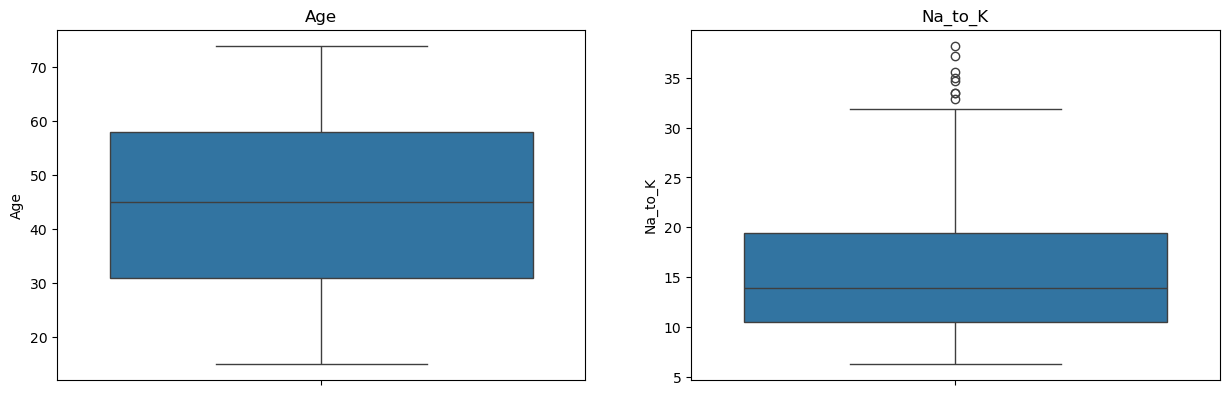

In [11]:
j=1
plt.figure(figsize=(15,10))
for i in df_num:
    plt.subplot(2,2,j)
    plt.title(i)
    sns.boxplot(y=df_num[i])
    j+=1

## For Categorical Column

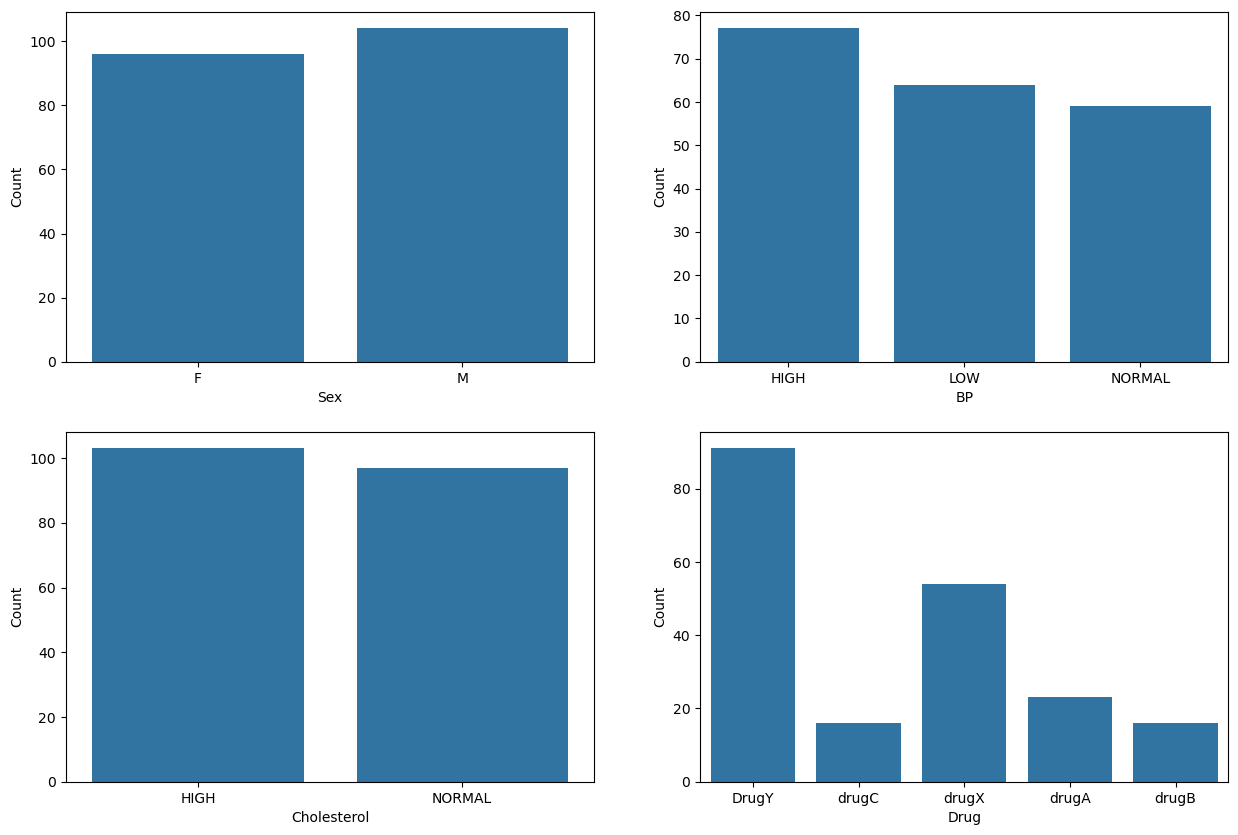

In [12]:
j = 1
plt.figure(figsize=(15,10))
for i in df_cat:
    plt.subplot(2,2,j)
    sns.countplot(x=df[i])
    plt.ylabel('Count')
    j+=1

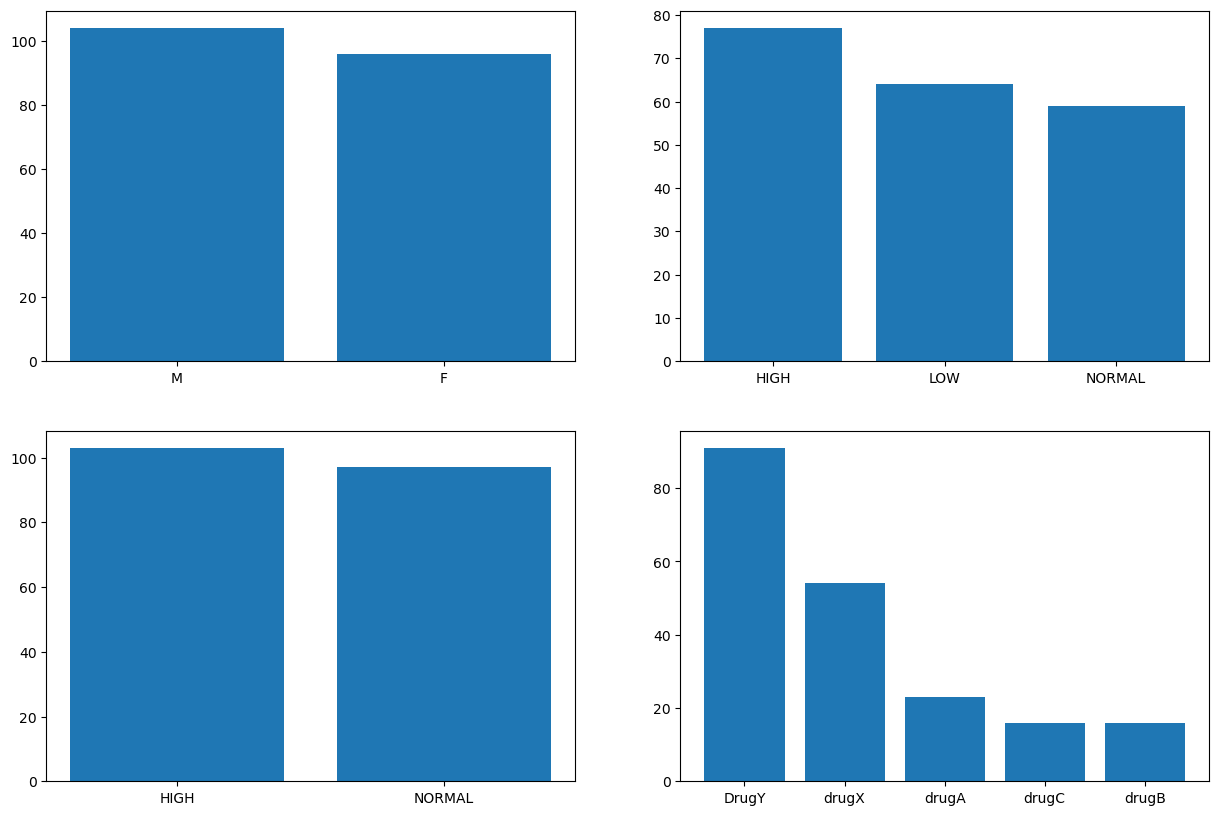

In [13]:
j=1
plt.figure(figsize=(15,10))
for i in df_cat:
    plt.subplot(2,2,j)
    x = df_cat[i].value_counts().keys()
    y = df[i].value_counts().values
    plt.bar(list(x),list(y))
    j+=1

## Bi-Varient analysis

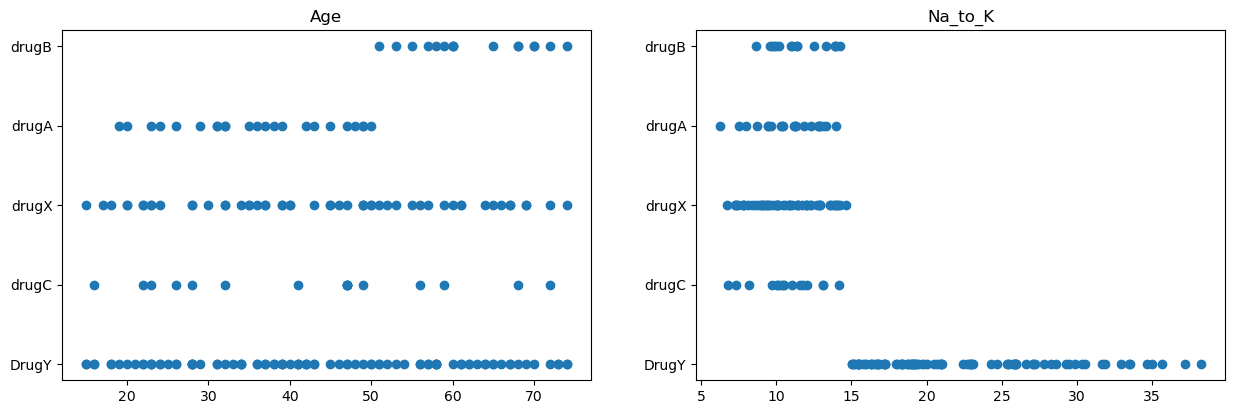

In [14]:
j=1
plt.figure(figsize=(15,10))
for i in df_num.iloc[:,:3]:
    plt.subplot(2,2,j)
    plt.title(i)
    plt.scatter(df[i],df['Drug'])
    j+=1

## Multi-varient analysis

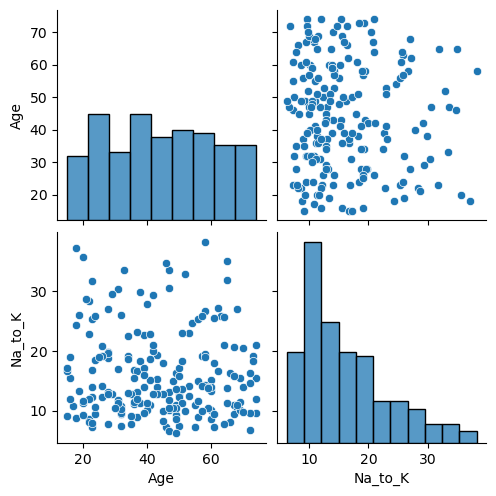

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
df_num.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: >

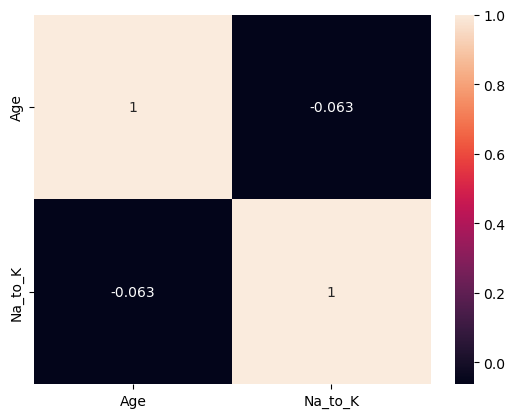

In [17]:
sns.heatmap(df_num.corr(),annot = True)

In [18]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Converting categorical to numerical column

In [19]:
df.replace({'Sex':{'F':0,'M':1},'BP':{'HIGH':2,'LOW':0,'NORMAL':1},'Cholesterol':{'HIGH':2,'LOW':0,'NORMAL':1},'Drug':{'DrugY':4,'drugX':3,'drugC':1,'drugA':2,'drugB':0}},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13568\1118233921.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'F':0,'M':1},'BP':{'HIGH':2,'LOW':0,'NORMAL':1},'Cholesterol':{'HIGH':2,'LOW':0,'NORMAL':1},'Drug':{'DrugY':4,'drugX':3,'drugC':1,'drugA':2,'drugB':0}},inplace=True)


In [20]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4


## LAbel Encodeing

In [21]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])

In [22]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,1
196,16,1,0,2,12.006,1
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


In [23]:
df_get_data = pd.get_dummies(df,dtype=int,drop_first=True)
df_get_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,1
196,16,1,0,2,12.006,1
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


In [24]:
pd.__version__

'2.2.3'

In [25]:
df.replace({'Sex':{'F':0,'M':1},'BP':{'HIGH':2,'LOW1':0,'NORMAL':1},'Cholesterol':{'HIGH':2,'LOW':0,'NORMAL':1},'Drug':{'DrugY':4,'drugX':3,'drugC':1,'drugA':2,'drugB':0}},inplace=True)

In [26]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,2,25.355,4
1,47,1,0,2,13.093,1
2,47,1,0,2,10.114,1
3,28,0,1,2,7.798,3
4,61,0,0,2,18.043,4
...,...,...,...,...,...,...
195,56,0,0,2,11.567,1
196,16,1,0,2,12.006,1
197,52,1,1,2,9.894,3
198,23,1,1,1,14.020,3


In [27]:
x = df.drop('Drug',axis=1)
y = df['Drug']

In [28]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,2,2,25.355
1,47,1,0,2,13.093
2,47,1,0,2,10.114
3,28,0,1,2,7.798
4,61,0,0,2,18.043


In [29]:
y.head()

0    4
1    1
2    1
3    3
4    4
Name: Drug, dtype: int64

## Train-Test split

In [30]:
from sklearn.model_selection import train_test_split as tts,cross_val_score as cs
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=45)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_new=sc.fit_transform(x_train)
x_test_new=sc.transform(x_test)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train_new,y_train)

KNeighborsClassifier()

In [33]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [34]:
df1=pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df1.head(10)

,Actual,Predictions
45,3,4
72,3,4
40,4,4
58,3,4
25,4,4
13,4,4
153,3,4
80,0,4
3,3,4
44,3,4


In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))

Train accuracy: 0.44375
Test accuracy: 0.5


In [36]:
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
parameters={'n_neighbors':list(range(1,50)),"p":[1,2]}
knn_model=GridSearchCV(model,parameters,cv=5)
knn_model.fit(x_train_new,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]})

In [37]:
print('Cross validation Score:',cs(model,x,y,cv=5).mean())
print('Confusion matrix :\n',confusion_matrix(y_test,y_test_pred))
print('Classification report:\n',classification_report(y_test,y_test_pred))

Cross validation Score: 0.6849999999999999
Confusion matrix :
 [[ 0  0  0  0  3]
 [ 0  0  0  0  3]
 [ 0  0  0  0  3]
 [ 0  0  0  0 11]
 [ 0  0  0  0 20]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        11
           4       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.10      0.20      0.13        40
weighted avg       0.25      0.50      0.33        40



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
knn_model.best_params_

{'n_neighbors': 1, 'p': 2}

In [39]:
model=KNeighborsClassifier(n_neighbors= 45, p= 2)
model.fit(x_train_new,y_train)

KNeighborsClassifier(n_neighbors=45)

In [40]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [41]:
print("Train accuracy :",accuracy_score(y_train,y_train_pred))
print('Test accuracy :',accuracy_score(y_test,y_test_pred))

Train accuracy : 0.44375
Test accuracy : 0.5


In [42]:
print('Cross validation Score :',cs(model,x,y,cv=5).mean())
print("Confustion matrix :\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Cross validation Score : 0.6599999999999999
Confustion matrix :
 [[ 0  0  0  0  3]
 [ 0  0  0  0  3]
 [ 0  0  0  0  3]
 [ 0  0  0  0 11]
 [ 0  0  0  0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        11
           4       0.50      1.00      0.67        20

    accuracy                           0.50        40
   macro avg       0.10      0.20      0.13        40
weighted avg       0.25      0.50      0.33        40



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
import time 
from sklearn.neighbors import KNeighborsClassifier
start_time=time.time()
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_new,y_train)
end_time=time.time()
time_diff=end_time-start_time
print('Excution time',time_diff)

Excution time 0.0029954910278320312


In [44]:
y_train_pred=knn_model.predict(x_train)
y_test_pred=knn_model.predict(x_test)
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))
print('Cross validation Score:',cs(knn_model,x,y,cv=5).mean())

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Train accuracy: 0.44375
Test accuracy: 0.5
Cross validation Score: 0.6849999999999999


In [45]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [46]:
y_train_pred=svm_model.predict(x_train)
y_test_pred=svm_model.predict(x_test)

In [47]:
df1=pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df1.head(10)

,Actual,Predictions
45,3,3
72,3,3
40,4,4
58,3,3
25,4,4
13,4,4
153,3,4
80,0,3
3,3,3
44,3,3


In [48]:
start_time=time.time()
y_train_pred=svm_model.predict(x_train)
y_test_pred=svm_model.predict(x_test)
end_time=time.time()
time_diff=end_time-start_time
print('Excution time',time_diff)
print('Train accuracy:',accuracy_score(y_train,y_train_pred))
print('Test accuracy:',accuracy_score(y_test,y_test_pred))
print('Cross validation Score:',cs(svm_model,x,y,cv=5).mean())

Excution time 0.015160322189331055
Train accuracy: 0.70625
Test accuracy: 0.75
Cross validation Score: 0.7049999999999998
